In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import cross_val_score

In [2]:
games = pd.read_csv('games_new_vars.csv')

In [3]:
games.columns

Index(['Unnamed: 0', 'id', 'rated', 'created_at', 'last_move_at', 'turns',
       'victory_status', 'winner', 'increment_code', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco',
       'opening_name', 'opening_ply', 'diff_rating', 'abs_diff_rating',
       'higher_rating', 'higher_rating_won', 'result', 'white_higher_rated'],
      dtype='object')

In [4]:
# Create a new variable for the difference in rating between two players.
games['diff_rating'] = games.white_rating - games.black_rating

In [5]:
# Create a new variable with absolute value of differences
games['abs_diff_rating'] = np.abs(games['diff_rating'])

In [6]:
# Create new key
# -- higher_rating will encode who has the higher rating. 
games['higher_rating'] = ''

In [7]:
# Given the organization of the data, positive differences in the diff_rating indicate white had a higher rating, 
# whereas negative ones indicated a higher rating for black. A difference of zero, of course, indicates an equal rating. 
games.loc[games.diff_rating > 0, 'higher_rating'] = 'white'
games.loc[games.diff_rating < 0, 'higher_rating'] = 'black'
games.loc[games.diff_rating == 0, 'higher_rating'] = 'same'

In [8]:
# ** We need to clean this code up
# Now, we encode a variable that returns 1 if the higher rating won and 0 otherwise. 
games['hr_won'] = 0
for i in list(range(len(games))):
    if games.higher_rating[i] == games.winner[i]:
        games.hr_won[i] = 1
    else:
        games.hr_won[i] = 0

/Users/Leonard/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Leonard/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# ** We need to clean this code up
# Also need to code higher rating as a binary so that we can easily use it 
games['higher_rating_coded'] = 0
for i in list(range(len(games))):
    if games.higher_rating[i] == 'white':
        games.higher_rating_coded[i] = 1
    else: # Note that I'm ignoring draws with this type of analysis, rn, in the moment.
        games.higher_rating_coded[i] = 0

/Users/Leonard/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Leonard/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Learning how to use kfold cross validation

In [10]:
X = games[['abs_diff_rating']]
Y = games.hr_won

In [11]:
lg = LogisticRegression()

In [12]:
lg_scores = cross_val_score(lg, X, Y , cv=10)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_spli

ImportError: cannot import name 'train_test_spli'

In [ ]:
lg_scores.mean()

Done learning how to use kfold cross validation. 

In [ ]:
kf =KFold( n_splits = 5)

In [ ]:
for train, test in kf.split(X, Y):
    print(train)
    print(test)

In [ ]:
train, test = kf.split(X, Y)

In [16]:

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('ChessUtility.py')
import ChessUtility

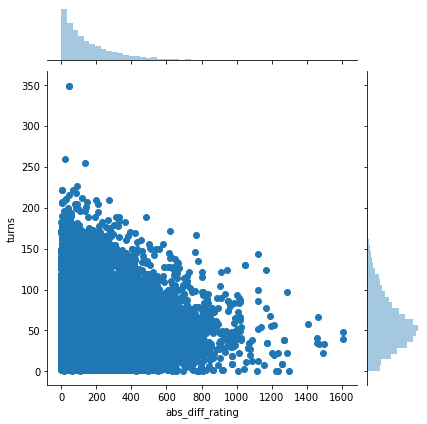

In [17]:
sns.jointplot('abs_diff_rating', 'turns', data = games, type = hex)